# **Project Name**    - **Coronavirus Tweets Sentiment Analysis-Classification**




##### **Project Type**    - Classification
##### **Contribution**    - Individual


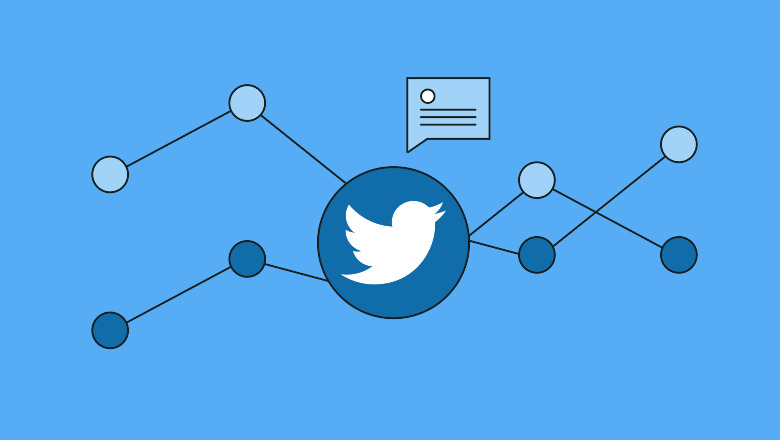

# **Project Summary -**

The project "Analyzing Sentiment of COVID-19 Tweets" aims to delve into the collective sentiment of Twitter users towards the COVID-19 pandemic.
Approaches during the whole project are Text Preprocessing, Exploratory Data Analysis, Feature Engineering & Pre-Preprocessing and Model Training.

ALGORITHMS USED:
Logistic Regression with Grid Search CV
Decision Tree Classifier(Count Vector and TF ID Vectorization techniques).
KNN(Count Vector and TF ID Vectorization techniques).
SVM Classifier (Count Vector and TF ID Vectorization techniques).
Multinomial Navies Bayes & Bernoulli Navies Bayes(Count Vector and TF ID Vectorization techniques).
Random Forest(Count Vector and TF ID Vectorization techniques).
Stochastic Gradient Descent(Count Vector and TF ID Vectorization techniques).

# **GitHub Link -**

https://github.com/Vipiz99/EDA-Coronavirus-Tweets-Sentiment-Analysis-Classification



# **Problem Statement**


**This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets. The tweets have been pulled from Twitter and manual tagging has been done then.The names and usernames have been given codes to avoid any privacy concerns.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud
import nltk
nltk.download('all',quiet=True)
from PIL import Image

from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Dataset Loading

In [ ]:
# Load Dataset
database = "/content/drive/MyDrive/Colab Notebooks/2. Eda Classification/Copy of Coronavirus Tweets (2).csv"
dataset =pd.read_csv(database)

### Dataset First View

In [ ]:
# Dataset First Look
dataset.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
dataset.shape

In [ ]:
dataset.columns

In [ ]:
dataset.index

### Dataset Information

In [ ]:
# Dataset Info
dataset.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
dataset.duplicated().sum()


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
dataset.isnull().sum()

In [ ]:
# Visualizing the missing values
dataset.isnull().sum().sort_values(ascending=False)

### What did you know about your dataset?

In this Dataset their are 6 column having 'Location', 'UserName', 'ScreenName', 'TweetAt', 'OriginalTweet','Sentiment' and 'Location' column have duplicated value i.e 8590 which can take action later on as proceed on our Classfication Machine Learning Project.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
dataset.columns

In [ ]:
# Dataset Describe
dataset.describe(include='all')

### Variables Description

**UserName:** This column contains the username of the person who posted the tweet.

**ScreenName:** This column contains the screen name or handle of the user who posted the tweet.

**Location:** This column contains the location of the user who posted the tweet. This could be their city, state, country, or any other geographic location that they have specified in their Twitter profile.

**TweetAt:** This column contains the date and time when the tweet was posted.

**OriginalTweet:** This column contains the actual text of the tweet that was posted.

**Sentiment:** This column contains the sentiment label assigned to the tweet. This label could be positive, negative,extremely positive,extremely negative neutral, depending on the sentiment analysis algorithm used to classify the tweet.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print(dataset.apply(lambda col: col.unique()))

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
# Count the number of occurrences of each sentiment value in the 'Sentiment' column of the 'tweet' DataFrame and reset the index
sentiment_count = dataset['Sentiment'].value_counts().reset_index()
# Rename the columns of the resulting DataFrame to 'Sentiment' and 'count', respectively
sentiment_count.columns = ['Sentiment','count']
sentiment_count

In [ ]:
plt.figure(figsize=(20,7))
ax = sns.barplot(x="Sentiment", y='count', data=sentiment_count)
ax.set_title("Proportion of Sentiment", fontsize=20)
ax.set_xlabel("Sentiment", fontsize=20)
ax.set_ylabel('count', fontsize=20)

In [ ]:
# replacing values
replace_values = {"Sentiment":{'Extremely Negative':'Negative', 'Extremely Positive':'Positive'}}
dataset = dataset.replace(replace_values)

In [ ]:
sentiment_count1 = dataset['Sentiment'].value_counts().reset_index()
sentiment_count1.columns = ['Sentiment','count']
sentiment_count1

##### 1. Why did you pick the specific chart?

**Because, a bar chart can permit a visual check of the accuracy and reasonableness of calculations.**

##### 2. What is/are the insight(s) found from the chart?

**We can seet that the positive sentiment is high as compared to negative and neutral.**

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
# Chart - 2 visualization code
sentiment_count1 = dataset['Sentiment'].value_counts().to_list()
labels=['Positive','Negative','Neutral']
plt.figure(figsize=(10,8))
plt.pie(x=sentiment_count1,explode=[0.04,0.04,0.1],shadow= True,labels=labels,autopct="%.2f%%",radius=1.1)
plt.title("Proportion Of Sentiments", fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

##### 1. Why did you pick the specific chart?

**Because, a pie chart can display relative proportions of multiple classes of data.In this case, the whole data is the set of tweets, and the parts are the different sentiment categories (positive, negative, and neutral).**

##### 2. What is/are the insight(s) found from the chart?

**We can see that the Positive Sentiment are high in proportion i.e., 43.85%, Negtive Sentiment is 37.41% and the Netural is 18.74%.**

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
#Top 10 most frequently locations
Top_Location_Of_tweet= dataset['Location'].value_counts().head(10)
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('white')

In [ ]:
Top_Location_Of_tweet

In [ ]:
Top_Location_Of_tweet=pd.DataFrame(Top_Location_Of_tweet)
Top_Location_Of_tweet.reset_index(inplace=True)
Top_Location_Of_tweet.rename(columns={'index':'Location', 'Location':'Location_Count'}, inplace=True)
Top_Location_Of_tweet

In [ ]:
viz_1=sns.barplot(x="Location", y="Location_Count", data=Top_Location_Of_tweet,
                 palette="husl")
# Set plot title, y-axis label, and x-axis label
viz_1.set_title('Locations with most of the tweets')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Location Names')
# Rotate x-axis labels by 45 degrees to make them easier to read
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

##### 1. Why did you pick the specific chart?

**To visualize this data, a bar chart is a good choice. A bar chart can effectively show the count of tweets from each location in a clear and concise way. Each location can be represented by a bar, with the height of the bar indicating the count of tweets from that location.**

##### 2. What is/are the insight(s) found from the chart?

**City London has the highest tweet amongs the all.**

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
#calculates the length (number of characters) of each tweet and stores the result in the text_length column.
dataset['text_length'] = dataset['OriginalTweet'].apply(len)

In [ ]:
tweet_character_length=dataset['text_length'].sort_values(ascending=False)

In [ ]:
# Create a DataFrame `top_tweet_character_length` from `tweet_character_length
top_tweet_character_length=pd.DataFrame(tweet_character_length)
# Reset the index of `top_tweet_character_length` and assign the result back to `top_tweet_character_length`
top_tweet_character_length.reset_index(inplace=True)
# Rename the columns of `top_tweet_character_length` to 'Original_Tweet_Row' and 'tweet_character_Count'
top_tweet_character_length.rename(columns={'index':'Original_Tweet_Row', 'text_length':'tweet_character_Count'}, inplace=True)

In [ ]:
top_tweet_character_length

In [ ]:
# Select the top 10 tweets with the longest character lengths, sort them in descending order, and assign them to `top_tweet_length`
top_tweet_length=top_tweet_character_length.head(10).sort_values(by='tweet_character_Count',ascending=False)
plt.figure(figsize=(12, 8))
# Create a bar plot using Seaborn, with 'Original_Tweet_Row' on the x-axis, 'tweet_character_Count' on the y-axis, and `top_tweet_length` as the data source
bar_plot = sns.barplot(x="Original_Tweet_Row", y="tweet_character_Count", data=top_tweet_length, palette='viridis')

##### 1. Why did you pick the specific chart?

**To visualize this data, a bar chart is a good choice. A bar chart can effectively show the Original_Tweet_Row from each location in a clear and concise way.**

##### 2. What is/are the insight(s) found from the chart?

**Row Number 25160 has highest Tweet length of character i.e 350**

#### Chart - 5

In [ ]:
# Chart - 5 visualization code
# Count the number of tweets for each unique date in the 'TweetAt' column of `tweet` and display the 15 most frequent dates
dataset['TweetAt'].value_counts()

In [ ]:
# Count the number of tweets for each unique date in the 'TweetAt' column of `tweet` and display the 15 most frequent dates
dataset['TweetAt'].value_counts().head(15)

In [ ]:
import pandas as pd
import plotly.express as px
# plot the original tweet column as a bar plot
dataset['TweetAt'].value_counts().head(15).plot(kind='bar',color='green')

# set the plot title and axis labels
plt.title('Count of Original Tweets by Date')
plt.xlabel('Tweet Date')
plt.ylabel('Count')

# display the plot
plt.show()

##### 1. Why did you pick the specific chart?

**The bar plot is a common and widely used chart type for visualizing categorical data, such as dates or categories, with a discrete count or frequency associated with each category.**

##### 2. What is/are the insight(s) found from the chart?

**Dated 20 March ,2020 has highest number of tweet i.e 3448.**

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
dataset.isnull().sum().sort_values(ascending=False)

#### What all missing value imputation techniques have you used and why did you use those techniques?

**Here we can find that 'Location' column having null values 8590 and we generally not take 'Location' column as machine learning model as Sentiment analysis.**

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
print(dataset[['OriginalTweet', 'Sentiment']].info())

##### What all outlier treatment techniques have you used and why did you use those techniques?

**We do not treated/handled the outliers because we did not take any column having continuous data (numerical data) as Dependent/Independent column during the model training.**

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

import regex as re

In [ ]:
# Lower Casing, Remove Punctuations, Remove URLs & Remove words and digits contain digits, Remove Stopwords, Remove White spaces, Rephrase Text, Tokenization
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

def transform_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Tokenize text into words
    words = nltk.word_tokenize(text)

    # Remove non-alphanumeric characters
    words = [word for word in words if word.isalnum()]

    # Remove stopwords and punctuation
    stopwords_set = set(stopwords.words('english'))
    punctuation_set = set(string.punctuation)
    words = [word for word in words if word not in stopwords_set and word not in punctuation_set]

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Join words into a string and return
    return ' '.join(lemmatized_words)

##### Which text normalization technique have you used and why?

**Here we use only Lemmatization normalization technique because Lemmatization is a technique used for text normalization that reduces words to their base or dictionary form, known as a lemma .Hence ,we used Lemmatization technique as proper text form and later used for classfication modelling .**

In [ ]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today https/20.89.")

In [ ]:
# Apply the `transform_text()` function to each value in the 'OriginalTweet' column of `tweet`
dataset["Clean_Tweets"] = dataset['OriginalTweet'].apply(transform_text)

In [ ]:
 # Access the 'OriginalTweet' value in the row with integer in `tweet`
 dataset.iloc[25160]["OriginalTweet"]

In [ ]:
dataset.head()

In [ ]:
# Create a new column in `tweet` called 'temp_list'
dataset['temp_list'] = dataset['Clean_Tweets'].apply(lambda x:str(x).split())

In [ ]:
dataset['temp_list']

In [ ]:
from collections import Counter
import pandas as pd

# Create a flattened list of all words in the nested list column
word_list = [word for sublist in dataset['temp_list'] for word in sublist]

# Count the frequency of each word and store in a Counter object
word_counts = Counter(word_list)

# Create a dataframe of the top 30 most common words
top_words = pd.DataFrame(word_counts.most_common(30), columns=['Common_words', 'count'])

# Apply a background gradient to the dataframe for better visualization
styled_top_words = top_words.style.background_gradient(cmap='Reds')

In [ ]:
top_words

In [ ]:
# Create a new DataFrame called `neutral` containing only the 'Clean_Tweets' column from `tweet` where the 'Sentiment' column is 'Neutral','positive','negative'.
neutral=pd.DataFrame(dataset[['Clean_Tweets']] [dataset['Sentiment'] == 'Neutral'])
positive=pd.DataFrame(dataset[['Clean_Tweets']] [dataset['Sentiment'] == 'Positive'])
negative=pd.DataFrame(dataset[['Clean_Tweets']] [dataset['Sentiment'] == 'Negative'])

In [ ]:
positive

In [ ]:
negative

In [ ]:
neutral

In [ ]:
pip install wordcloud

In [ ]:
# Create an empty list called `spam_corpus`
spam_corpus = []
# Iterate over each row in a DataFrame called `tweet` where the 'Sentiment' column has the value 'Neutral'
for msg in dataset[dataset['Sentiment'] =='Neutral']['Clean_Tweets'].tolist():
  # Split the 'Clean_Tweets' value into individual words using the `split()` method
    for word in msg.split():
       # Append each word to the `spam_corpus` list
        spam_corpus.append(word)

In [ ]:
top_words

In [ ]:
# Import the `Counter` class from the `collections` module
from collections import Counter
plt.figure(figsize=(20,10))
# Import the `seaborn` library for creating data visualizations
sns.barplot(x='Common_words',y='count',data=top_words)
# Set the x-axis labels to be vertical
plt.xticks(rotation='vertical')
# Show the plot
plt.show()

In [ ]:
# Import the `WordCloud` class from the `wordcloud` module
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
# Generate a word cloud using the `WordCloud` object and the text data from the 'Clean_Tweets' column of a DataFrame called `neutral`
tweet_wc = wc.generate(str(neutral['Clean_Tweets']))
plt.figure(figsize=(10,10))
plt.imshow(tweet_wc)

In [ ]:
# Generate a word cloud using the `WordCloud` object and the text data from the 'Clean_Tweets' column of a DataFrame called `positive`
tweet_wc = wc.generate(str(positive['Clean_Tweets']))
plt.figure(figsize=(10,10))
plt.imshow(tweet_wc)

In [ ]:
# Generate a word cloud using the `WordCloud` object and the text data from the 'Clean_Tweets' column of a DataFrame called `negative`
tweet_wc = wc.generate(str(negative['Clean_Tweets']))
plt.figure(figsize=(10,10))
plt.imshow(tweet_wc)

### 5. Data Scaling

In [ ]:
#Assigning dependent and independent features
X= dataset['Clean_Tweets']
y= dataset['Sentiment']

In [ ]:
# Applying Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=10)

##### Which method have you used to scale you data and why?

**Data Splitting ratio is 80% used for Training Data and 20% used for Test Data. By providing more data for training, the model can learn more patterns and trends in the data, which can lead to better predictions on new or unseen data.**

In [ ]:
#checking shape of splitted data
print(X_train.shape)
y_test.shape

### 6. Handling Imbalanced Dataset

In [ ]:
dataset.info()

##### Do you think the dataset is imbalanced? Explain Why.

**No , here we decided that We used only two column for machine learning modelling i.e 'Original Tweet' & 'Sentiment' and in both column eqaul no of rows**

## ***7. ML Model Implementation***

# **Count Vectorization (Bag of words)**

Count vectorization is a process of converting a piece of text into a numerical format that can be used by machine learning algorithms. In this process, the text is first split into words or tokens, and then each token is counted to create a vector of numbers representing the frequency of each word in the text.

**# Vectorizing Text**

In [ ]:
# Vectorization
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [ ]:
# Bag of words
bw=CountVectorizer(binary=False,max_df=1.0,min_df=5,ngram_range=(1,2))
bw_X_train=bw.fit_transform(X_train.astype(str).str.strip())

In [ ]:
# Get the shape of the NumPy array bw_X_train
bw_X_train.shape

In [ ]:
# Use the Trained CountVectorizer 'bw' to transform the test data 'X_test' into a bag-of-words representation
# The text data in 'X_test' is first converted to a string representation & then stripped of leading & trailing whitespace characters
bw_X_test=bw.transform(X_test.astype(str).str.strip())

In [ ]:
# Get the shape of the NumPy array bw_X_test
bw_X_test.shape

### ML Model - 1

# **Logistic regression**


In [ ]:
# Initializing the logistic regression model
lr_cv = LogisticRegression()

# Defining a dictionary of hyperparameters to tune over
parameters = {
    'penalty': ['l1', 'l2'],  # Regularization penalty to apply (L1 or L2)
    'C': [100, 10, 1.0, 0.1, 0.01]  # Inverse of regularization strength (lower values indicate stronger regularization)
}

# Creating a GridSearchCV object with cross-validation of 15
logreg_Gcv = GridSearchCV(lr_cv, parameters, cv=15)

# Fitting the training data to the GridSearchCV object to find the best hyperparameters
logreg_Gcv.fit(bw_X_train, y_train)

In [ ]:
#predicted values
pred_lr_cv = logreg_Gcv.predict(bw_X_test)

In [ ]:
pred_lr_cv

In [ ]:
#Accuracy
accuracy_lr_cv = accuracy_score(y_test,pred_lr_cv)
print("Accuracy :",(accuracy_lr_cv))

In [ ]:
# Classification report of Performance metrics
label=['neutral','positive','negative']
print(classification_report(y_test,pred_lr_cv))

In [ ]:
#Plotting Confussion matrix
cf1= (confusion_matrix(y_test,pred_lr_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf1, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Logistic Regression with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Here the algrothim used Logistic Regression with accuracy of 79% and different Evaluation metric Score with labels 'Negative', 'Neutral', Positive like precision ,recall, f1 score is also increased.**

#### 2. Which hyperparameter optimization technique have you used and why?

**GridSearchCV is used to tune two hyperparameters for the logistic regression model - the regularization penalty (L1 or L2) and the inverse of regularization strength (C). The performance of the model is evaluated using cross-validation with a cv parameter set to 15.**

### 3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Yes, as seen in above Evaluation metric Score Chart as follows**

**Accuracy:**-79%

**precision:**-77%

**recall:**- 77%

**f1-score:**- 77%

### ML Model - 2

# **Decision Tree Classifier with CV**


A Decision tree is a flowchart-like structure where each internal node represents a test on an attribute (i.e., a feature),each branch represents the outcome of the test, and each leaf node represents a class label or a numerical value (in the case of regression).

In [ ]:
# Initializing model
dt_cv=DecisionTreeClassifier()

#fitting the data to model
dt_cv.fit(bw_X_train,y_train)

#predicted values
pred_dt_cv=dt_cv.predict(bw_X_test)

In [ ]:
# Accuracy
cv_score_dt_cv= cross_val_score(dt_cv,bw_X_train,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_dt_cv)))

In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_dt_cv))

In [ ]:
cf2= (confusion_matrix(y_test,pred_dt_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf2, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Decision tree with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Here the algrothim used Decision Tree with accuracy of 70% and different Evaluation metric Score with labels 'Negative', 'Neutral', Positive like precision ,recall, f1 score is also increased.**

#### 2. Which hyperparameter optimization technique have you used and why?

**Scikit-learn library is used to perform cross-validation on the decision tree model with 5 folds. The np.mean function is then used to calculate the average accuracy score across all folds.**

### 3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, as seen in above Evaluation metric Score Chart as follows

**Accuracy:**-70%

**precision:**-71%

**recall:**- 70%

**f1-score:**- 71%

### ML Model - 3

# **Navie Bayes**

In [ ]:
#Import Library GaussianNB,MultinomialNB,BernoulliNB and score metrics like accuracy ,confusion etc.
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
# Apply both  type of navies one by one
mnb = MultinomialNB()
bnb = BernoulliNB()

# **Multinomial Navie Bayes**

In [ ]:
# Fit a Multinomial Naive Bayes classifier 'mnb' to the bag-of-words representation of the training data 'bw_X_train' and the corresponding labels 'y_train'
mnb.fit(bw_X_train,y_train)
# Use the trained classifier to predict the labels for the bag-of-words representation of the test data 'bw_X_test'
y_pred2 = mnb.predict(bw_X_test)
# Compute the accuracy of the predicted labels 'y_pred2' with respect to the true labels 'y_test'
accuracy_mnb = accuracy_score(y_test,y_pred2)
# Print the accuracy of the Multinomial Naive Bayes classifier
print(accuracy_mnb)

In [ ]:
label=['Neutral','Positive','Negative']
print(classification_report(y_test,y_pred2))

In [ ]:
cf3= (confusion_matrix(y_test,y_pred2))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf3, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Mutinomial Navies Bayes)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**In the code provided, the Multinominal Navies Bayes algorithm was used to classify the data, resulting in an accuracy of 68%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and showed improvement compared to the baseline model.**

### 2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart

Yes, as seen in above Evaluation metric Score Chart as follows

**Accuracy:**-68%

**Precision:**-68%

**Recall:**- 69%

**f1-score:**- 68%

## **Bernoulli Navies Bayes**


In [ ]:
#Fit a Multinomial Naive Bayes classifier 'mnb' to the bag-of-words representation
bnb.fit(bw_X_train,y_train)
# Use the trained classifier to predict the labels for the bag-of-words representation of the test data 'bw_X_test'
y_pred3 = bnb.predict(bw_X_test)
# Compute the accuracy of the predicted labels 'y_pred3' with respect to the true labels 'y_test'
accuracy_bnb = accuracy_score(y_test,y_pred3)
# Print the accuracy of the bernoulli Naive Bayes classifier
print(accuracy_bnb)

In [ ]:
label=['Neutral','Positive','Negative']
print(classification_report(y_test,y_pred3))

In [ ]:
cf4= (confusion_matrix(y_test,y_pred3))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf4, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Bernouli Navies Bayes)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### 1.Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**In the code provided, the Bernouli Navies Bayes algorithm was used to classify the data, resulting in an accuracy of 69%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and showed improvement compared to the baseline model.**

### 2.Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart

Yes, as seen in above Evaluation metric Score Chart as follows

**Accuracy:**-69%

**Precision:**-68%

**Recall:**- 70%

**f1-score:**- 68%

### ML Model - 4

# **KNN(K-Nearest Neighbours)**


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Define parameter grid with range of values for n_neighbors
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,9]}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)

# Fit KNN model to training data and perform grid search
grid_search.fit(bw_X_train, y_train)

# Print best hyperparameters and corresponding mean cross-validation score
print('Best hyperparameters:', grid_search.best_params_)
print('Mean cross-validation score:', grid_search.best_score_)

In [ ]:
#predicted values
pred_knn_cv = grid_search.predict(bw_X_test)

In [ ]:
pred_knn_cv

In [ ]:
# Accuracy
accuracy_KNN = accuracy_score(y_test,pred_knn_cv)
print("Accuracy :",(accuracy_KNN))

In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_knn_cv))

In [ ]:
cf_knn= (confusion_matrix(y_test,pred_knn_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf_knn, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (KNN with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**KNN algorithm was used to classify the data, resulting in an accuracy of 39%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and showed not improved compared to the baseline model.**

### 2. Which hyperparameter optimization technique have you used and why?

**The range of possible values for n_neighbors is defined in the param_grid dictionary, which contains a list of integers from 1 to 9. GridSearchCV is then used to evaluate the performance of the KNN algorithm with each value of n_neighbors, using 5-fold cross-validation.**

### 3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, as seen in above Evaluation metric Score Chart as follows

**Accuracy:**-38%

**Precision:**-53%

**Recall:**-47%

**f1-score:**- 40%

**ML Model - 5**

# **Support Vector Machine**


In [ ]:
# Initializing model
svm_cv = SVC()

#fitting the data to model
svm_cv.fit(bw_X_train,y_train)

#prediction
pred_svm_cv = svm_cv.predict(bw_X_test)

In [ ]:
pred_svm_cv

In [ ]:
# Accuracy
accuracy_svc = accuracy_score(y_test,pred_svm_cv)
print("Accuracy :",(accuracy_svc))

In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_svm_cv))

In [ ]:
cf6= (confusion_matrix(y_test,pred_svm_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf6, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (SVM with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Support Vector Machine algorithm was used to classify the data, resulting in an accuracy of 76%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and showed improved compared to the baseline model.**

### 2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart

Yes, as seen in above Evaluation metric Score Chart as follows

**Accuracy:**-75%

**Precision:**-77%

**Recall:**- 77%

**f1-score:**-77%

**ML Model - 6**

# **Random Forest**


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
rf_clf =RandomForestClassifier(n_estimators=100, random_state=42)

# Fit classifier to training data
rf_clf.fit(bw_X_train, y_train)

# Predict labels for test data
y_pred_rf = rf_clf.predict(bw_X_test)

# Calculate accuracy of classifier on test data
accuracy_rf = (y_pred_rf == y_test).mean()
print('Accuracy_rf:', accuracy_rf)


In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,y_pred_rf))

In [ ]:
cf7= (confusion_matrix(y_test,y_pred_rf))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf7, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Random Forest with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Random Forest algorithm was used to classify the data, resulting in an accuracy of 76%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and not slightly improved compared to the baseline model.**

### 2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart

No, as seen in above Evaluation metric Score Chart as follows

**Accuracy:**-76%

**Precision:**-75%

**Recall:**- 75%

**f1-score:**-75%

**ML Model - 7**

# **Stochastic Gradient Descent**


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
# Initialize SGDClassifier object with desired hyperparameters
sgd_clf = SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, random_state=42, max_iter=1000)

# Train the model on the training data
sgd_clf.fit(bw_X_train, y_train)

# Predict labels for test data
y_pred_sgd = sgd_clf.predict(bw_X_test)

# Calculate accuracy of classifier on test data
accuracy_sgd= accuracy_score(y_test, y_pred_sgd)
print('Accuracy_sgd:', accuracy_sgd)



In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,y_pred_sgd))

In [ ]:
cf8= (confusion_matrix(y_test,y_pred_sgd))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf8, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (STOCHASTIC GRADIENT DESCENT CLASSIFIER with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Stochastic Gradient Descent algorithm was used to classify the data, resulting in an accuracy of 80%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and much improved compared to the all the baseline model.**

### 2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart

Yes, as seen in above Evaluation metric Score Chart as follows and here accuracy is much better as compared to all the baseline model algorthim.This Stochastic Gradient Descent algorthim used for model deployement as Sentiment Analysis using Vectorization techinque Count Vectorizer(Bags of Word).

**Accuracy:**-80%

**Precision:**-81%

**Recall:**- 80%

**f1-score:**-80%

### **TF-IDF VECTORIZATION(Term Frequency-Inverse Document Frequency**)


**Data Splitting**


In [ ]:
X=dataset['Clean_Tweets']
y=dataset['Sentiment']

In [ ]:
# Applying Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=10)

In [ ]:
print(X_train.shape)
y_test.shape

## **Vectorizing Text**

In [ ]:
# Vectorization
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [ ]:
# TF-IDF
tv=TfidfVectorizer(use_idf=True,max_df=1.0,min_df=5,ngram_range=(1,2),sublinear_tf=True)
tv_X_train=tv.fit_transform(X_train.astype(str).str.strip())

In [ ]:
tv_X_train.shape

In [ ]:
tv_X_test=tv.transform(X_test.astype(str).str.strip())


**MODEL - 1 (TF-IDF)**

# **Logistic Regression**

In [ ]:
# Initializing model
lr_tv=LogisticRegression()
parameters = dict(penalty=['l1', 'l2'],C=[100, 10, 1.0, 0.1, 0.01])

#Hyperparameter tuning by GridserchCV
lr_tv_Gcv=GridSearchCV(lr_tv,parameters,cv=5)

#fitting the data to model
lr_tv_Gcv.fit(tv_X_train,y_train)

In [ ]:
#predicted values
pred_lr_tv_Gcv = lr_tv_Gcv.predict(tv_X_test)

In [ ]:
#Accuracy
accuracy_lr_Gcv = accuracy_score(y_test,pred_lr_tv_Gcv)
print("Accuracy :",(accuracy_lr_Gcv))

In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_lr_tv_Gcv))

In [ ]:
cf1a= (confusion_matrix(y_test,pred_lr_tv_Gcv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf1a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Logistic Regg with TF/IDF)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Logistic Regression algorithm was used to classify the data, resulting in an accuracy of 78%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and much improved compared to the all the baseline model.**

### 2. Which hyperparameter optimization technique have you used and why?

**The hyperparameter space is defined by the "parameters" dictionary, which specifies the values of the regularization parameter C and the penalty term (l1 or l2). GridSearchCV also helps to prevent overfitting and ensures that the model generalizes well to unseen data.**

### 3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart

Yes, as seen in above Evaluation metric Score Chart as follows and here accuracy is much better as compared to all the baseline model algorthim.This Logistic Regression algorthim used for model deployement as Sentiment Analysis using Vectorization techinque TF-IDF( Term Frequency -Inverse Document Frequency).

Accuracy:-78%

Precision:-79%

Recall:- 79%

f1-score:-79%

**MODEL - 2 (TF-IDF)**

# **Decision Tree**

In [ ]:
# Initializing model
dt_tv=DecisionTreeClassifier()

#fitting the data to model
dt_tv.fit(tv_X_train,y_train)

#prediction
pred_dt_tv=dt_tv.predict(tv_X_test)

In [ ]:
pred_dt_tv

In [ ]:
# Accuracy
cv_score_dt_tv= cross_val_score(dt_tv,tv_X_train,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_dt_tv)))

In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_dt_tv))

In [ ]:
#Plotting Confussion matrix
cf2a= (confusion_matrix(y_test,pred_dt_tv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf2a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Decision Tree with TF/IDF)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Decision Tree algorithm was used to classify the data, resulting in an accuracy of 62%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and much improved compared to the all the baseline model.**

### 2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart

No, as seen in above Evaluation metric Score Chart as follows and here accuracy is not much better as compared to all the baseline model algorthim as technique TF-IDF( Term Frequency -Inverse Document Frequency).

**Accuracy:**-62%

**Precision:**-60%

**Recall:**- 60%

**f1-score:**-60%

**MODEL - 3 (TF-IDF)**

# **Navie Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
mnb.fit(tv_X_train,y_train)
y_pred2_mnb_tv = mnb.predict(tv_X_test)
accuracy_mnb_tv = accuracy_score(y_test,y_pred3)
print(accuracy_score(y_test,y_pred2_mnb_tv))


In [ ]:
label=['Neutral','Positive','Negative']
print(classification_report(y_test,y_pred2_mnb_tv))


In [ ]:
cf3a= (confusion_matrix(y_test,y_pred2_mnb_tv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf3a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Multinominal with TF/IDF)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Multinomial Navies Bayes was used to classify the data, resulting in an accuracy of 65%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and much improved compared to the all the baseline model.**

### 2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart

Yes, as seen in above Evaluation metric Score Chart as follows and here accuracy is much better as compared to all the baseline model algorthim as technique TF-IDF( Term Frequency -Inverse Document Frequency).

**Accuracy:**-65%

**Precision:**-68%

**Recall:**- 66%

**f1-score:**-62%

**Bernoulli Navies Bayes**

In [ ]:
bnb.fit(tv_X_train,y_train)
y_pred3_bnb_tv = bnb.predict(tv_X_test)
accuracy_bnb_tv = accuracy_score(y_test,y_pred3)
print(accuracy_score(y_test,y_pred3_bnb_tv))

In [ ]:
label=['Neutral','Positive','Negative']
print(classification_report(y_test,y_pred3_bnb_tv))

In [ ]:
cf4a= (confusion_matrix(y_test,y_pred3_bnb_tv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf4a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Bernouli with TF/IDF)', fontsize=20)
ax.xaxis.set_ticklabels(labels)

### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Bernoulli Navies Bayes was used to classify the data, resulting in an accuracy of 69%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and much improved compared to the all the baseline model.**

### 2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart

Yes, as seen in above Evaluation metric Score Chart as follows and here accuracy is much better as compared to all the baseline model algorthim as technique TF-IDF( Term Frequency -Inverse Document Frequency).

**Accuracy:**-69%

**Precision:**-68%

**Recall:**- 70%

**f1-score:**-68%

**MODEL - 4 (TF-IDF)**

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
rf_clf =RandomForestClassifier(n_estimators=100, random_state=42)

# Fit classifier to training data
rf_clf.fit(tv_X_train, y_train)

# Predict labels for test data
y_pred_rf_tv = rf_clf.predict(tv_X_test)

# Calculate accuracy of classifier on test data
accuracy_tv_rf = (y_pred_rf_tv == y_test).mean()
print('Accuracy_tv_rf:', accuracy_tv_rf)

In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,y_pred_rf_tv))

In [ ]:
cf5a= (confusion_matrix(y_test,y_pred_rf_tv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf5a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Random Forest with GridsearchCV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### 1.Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Random Forest was used to classify the data, resulting in an accuracy of 73%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and much improved model as compared to the all the baseline model.**

### 2.Which hyperparameter optimization technique have you used and why?

**The Random Forest Classifier has been initialized with some default values for the hyperparameters, including n_estimators=100 and random_state=42.In this case, the default values have been used to fit the model to the training data and predict the labels for the test data.**

### 3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart

Yes, as seen in above Evaluation metric Score Chart as follows and here accuracy is improved as compared to all the baseline model algorthim as technique TF-IDF( Term Frequency -Inverse Document Frequency).

**Accuracy:**-72%

**Precision:**-73%

**Recall:**- 73%

**f1-score:**-73%

**MODEL - 5 (TF-IDF)**

# **Stochastic Gradient Descent**

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
# Initialize SGDClassifier object with desired hyperparameters
sgd_clf = SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, random_state=42, max_iter=1000)

# Train the model on the training data
sgd_clf.fit(tv_X_train, y_train)

# Predict labels for test data
y_pred_sgd_tv = sgd_clf.predict(tv_X_test)

# Calculate accuracy of classifier on test data
accuracy_sgd_tv= accuracy_score(y_test, y_pred_sgd_tv)
print('Accuracy:', accuracy_sgd_tv)


In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,y_pred_sgd_tv ))

In [ ]:
cf6a= (confusion_matrix(y_test,y_pred_sgd_tv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf6a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Stochastics Classifer with GridsearchCV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### 1.Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Stochastic Gradient Descent was used to classify the data, resulting in an accuracy of 76%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and much improved model as compared to the all the baseline model**

### 2.Which hyperparameter optimization technique have you used and why?

**The Stochastic Gradient Descent (SGD) Classifier has been initialized with some default values for the hyperparameters, including loss='hinge', penalty='l2', alpha=0.0001, random_state=42, and max_iter=1000. In this case, the default values have been used to fit the model to the training data and predict the labels for the test data.**

### 3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart

Yes, as seen in above Evaluation metric Score Chart as follows and here accuracy is improved as compared to all the baseline model algorthim as technique TF-IDF( Term Frequency -Inverse Document Frequency).

**Accuracy:**-72%

**Precision:**-77%

**Recall:**- 77%

**f1-score:**-76%

**MODEL - 6 (TF-IDF)**

# **Support Vector Machine**

In [ ]:
# Initializing model
svm_cv = SVC()

#fitting the data to model
svm_cv.fit(tv_X_train,y_train)

#prediction
pred_svm_cv = svm_cv.predict(tv_X_test)

In [ ]:
# Accuracy
accuracy_svc = accuracy_score(y_test,pred_svm_cv)
print("Accuracy :",(accuracy_svc))

In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_svm_cv))

In [ ]:
cf7a= (confusion_matrix(y_test,pred_svm_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf7a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Support Vector Machine with GridsearchCV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### 1.Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Support Vector Machine was used to classify the data, resulting in an accuracy of 77%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and much improved model as compared to the all the baseline model.**

### 2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart

 Yes, as seen in above Evaluation metric Score Chart as follows and here accuracy is improved as compared to all the baseline model algorthim as technique TF-IDF( Term Frequency -Inverse Document Frequency).

**Accuracy:**-77%

**Precision:**-76%

**Recall:**- 73%

**f1-score:**-74%

In [ ]:
acurracy = {'Model':  ['Logistic Regression with GridserachCV', 'Decision Tree Classifier','Support-Vector-Machine Classifier','Multinomial Navies Bayes','Bernoulli Navies Bayes','Stochastic Gradient Descent','Random Forest'],
        'Count Vector':  [accuracy_lr_cv,np.mean(cv_score_dt_cv),accuracy_svc,accuracy_bnb,accuracy_mnb,accuracy_sgd,accuracy_rf],
        'Tf/idf Vector': [accuracy_lr_Gcv,np.mean(cv_score_dt_tv),accuracy_svc,accuracy_mnb_tv,accuracy_bnb_tv,accuracy_sgd_tv,accuracy_tv_rf]}

cv_score_table= pd.DataFrame (acurracy, columns = ['Model','Count Vector','Tf/idf Vector'])
cv_score_table

### 1. Which ML model did you choose from the above created models as your final prediction model and why?


**Based on the metrics chart above, we can conclude that the Stochastic Gradient Descent modelusing Count VectorizationTechnique performed better with an accuracy level of 80%, compared to Logistic Regression using Tf/idf Vectorization which achieved an accuracy level of 78%. Therefore, we have decided to deploy the Stochastic Gradient Descent model using Count Vectorization Technique**

### 2. Explain the model which you have used and the feature importance using any model explainability tool?



**1-The model that we have used is the Stochastic Gradient Descent (SGD) classifier, which is a linear classifier that uses gradient descent optimization to update the model parameters. The Count Vectorization Technique works by counting the occurrence of each word in the text data and then creating a document-term matrix where each row represents a document and each column represents a word in the vocabulary.**

**2-To understand the feature importance, we can use the Permutation Importance technique provided by the scikit-learn library. The Permutation Importance technique works by randomly permuting the values of a feature and observing the effect on the model's performance**

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

1.We applied 8 models namely, Logistic Regression with Grid Search CV, Decision Tree Classifier,Stochastic Gradient Descent , KNN, SVM,Multinomial Navies Bayes,Bernoulli Navies Bayes Classifier for both Count Vector And TF ID Vectorization techniques.

2..We conclude that the machine is generating the best results for the Stochastic Gradient Descent(count vectorizer) model with an Accuracy of 80.43% followed by the Logistic Regression with Grid Search CV (TF/ID vectorizer) model with an Accuracy of 78.86%.

3.In the future ,we can repeat the analysis and compare it with the present sentimental analysis to gauge the impact of the initiatives on the ground

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***